# Making our own college rankings

## Libraries
We need a few libraries installed. Let us check to make sure they are installed first:

In [1]:
!pip install openpyxl pandas numpy 

Defaulting to user installation because normal site-packages is not writeable


Now we must import those libraries

In [2]:
import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None

import numpy as np

import scipy.stats as stats

## Read in an excel file that is uploaded to the current directory
If you have a csv file, you do `data = pd.read_csv("college_rankings.csv")`

In [3]:
data = pd.read_excel("college_rankings_data.xlsx")

### Exploring the data

In [4]:
data

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
0,Alabama A & M University,1,0.0,0.9175,2353.0,939.0,5546.0,18.0,0.0797,9240.0,9240.0,0.1589,0.0000,0.0554,0.1196,0.0000,0.0250,NaN,7709.0,0.2974,0.0,1.0,34.783368,-86.568502,31000.0,10221.0,455.0,470.0,0.0,14990.0,1431.0,5271.0,0.0,0.7110,0.7361,0.0019,0.9072,0.0011,0.0091,0.0070,0.0114,0.0383,0.7019,0.0140,0.6033,5.0,AL,35762
1,University of Alabama at Birmingham,1,0.0,0.7366,24495.0,1234.0,14983.0,15.0,0.4023,12307.0,12307.0,0.2008,0.0377,0.0160,0.0635,0.2214,0.0335,537349307.0,11049.0,0.6340,0.0,0.0,33.505697,-86.799345,22250.0,9500.0,608.0,620.0,0.0,16953.0,14554.0,13328.0,0.0,0.7754,0.4798,0.0678,0.2414,0.0003,0.0565,0.0230,0.0446,0.1996,0.3512,0.5586,0.6110,5.0,AL,35294
2,University of Alabama in Huntsville,1,0.0,0.8257,23917.0,1319.0,8488.0,16.0,0.2696,10400.0,10400.0,0.1809,0.0113,0.0743,0.2875,0.1562,0.0225,77250279.0,9688.0,0.5768,0.0,0.0,34.724557,-86.640449,21450.0,9500.0,695.0,669.0,0.0,15860.0,131.0,7785.0,0.0,0.6434,0.3976,0.0347,0.0879,0.0014,0.0566,0.0218,0.0361,0.1543,0.2536,0.7161,0.4190,5.0,AL,35899
3,Alabama State University,1,0.0,0.9690,21866.0,946.0,9346.0,19.0,0.1648,7320.0,6050.0,0.1098,0.0941,0.0686,0.0020,0.1431,0.0157,94536751.0,7221.0,0.3276,0.0,1.0,32.364317,-86.295677,31000.0,10489.0,470.0,480.0,0.0,13650.0,13531.0,3750.0,0.0,0.6501,0.8232,0.0037,0.9275,0.0008,0.0099,0.0147,0.0120,0.0691,0.7627,0.0163,0.6309,5.0,AL,36104
4,The University of Alabama,1,0.0,0.8268,29872.0,1261.0,9983.0,15.0,0.5020,13636.0,13636.0,0.2824,0.1060,0.0129,0.1301,0.0854,0.0394,832842409.0,10291.0,0.7110,0.0,0.0,33.211875,-87.545978,23072.0,9500.0,605.0,605.0,0.0,22597.0,19322.0,31900.0,0.0,0.7604,0.3802,0.0119,0.1008,0.0012,0.0505,0.0235,0.0352,0.0828,0.1772,0.7683,0.5549,5.0,AL,35487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,Mechon L'hoyroa,2,0.0,NaN,NaN,NaN,44299.0,24.0,NaN,NaN,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,2367.0,NaN,0.0,0.0,41.117029,-74.058177,NaN,NaN,NaN,NaN,0.0,NaN,NaN,55.0,0.0,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0909,0.8000,1.0000,0.0000,2.0,NY,10952
1995,Bais Medrash Mayan Hatorah,1,0.0,0.6667,1665.0,NaN,4706.0,24.0,NaN,14560.0,2200.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,1118.0,NaN,0.0,0.0,40.107414,-74.204332,NaN,NaN,NaN,NaN,0.0,13498.0,NaN,46.0,0.0,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0435,0.0000,0.0435,0.1515,0.9565,0.0000,2.0,NJ,8701
1996,Purdue University Northwest,2,0.0,0.2857,17323.0,1074.0,9425.0,18.0,0.1844,7800.0,7765.0,0.1563,0.0384,0.0384,0.0777,0.3930,0.0237,30008886.0,8324.0,0.3778,0.0,0.0,41.584324,-87.474236,21207.0,9500.0,535.0,535.0,0.0,11250.0,6911.0,7546.0,0.0,0.9971,0.3518,0.0298,0.0999,0.0007,0.2120,0.0219,0.0284,0.2387,0.3291,0.5914,0.5510,3.0,IN,46323
1997,Yeshiva Kollel Tifereth Elizer,1,0.0,0.7143,19643.0,NaN,4119.0,24.0,NaN,14560.0,4600.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,NaN,2615.0,NaN,0.0,0.0,40.637096,-73.992171,NaN,NaN,NaN,NaN,0.0,8283.0,8283.0,128.0,0.0,0.9167,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0078,0.8925,1.0000,0.000

In [5]:
data.columns

Index(['name', 'urban_rural', 'aapi_serving', 'acceptance_rate',
       'average_tuition_1yr', 'sat_avg', 'teaching_spent_per_student',
       'carnegie_classification', 'completion_rate_4yr',
       'cost_roomboard_offcampus', 'cost_roomboard_oncampus',
       'percent_degrees_business', 'percent_degrees_comm',
       'percent_degrees_compsci', 'percent_degrees_eng',
       'percent_degrees_health', 'percent_degrees_socsci', 'endowment',
       'avg_faculty_salary_mo', 'completion_rate_6yrs', 'hispanic_serving',
       'historically_black', 'latitude', 'longitude', 'median_debt_at_grad',
       'median_debt_at_withdraw', 'sat_avg_math', 'sat_avg_reading',
       'men_only', 'net_price', 'net_price_parents_under_30k',
       'num_undergrads', 'online_only', 'percent_fulltime_faculty',
       'ugs_percent_anyloans', 'ugs_percent_asian', 'ugs_percent_black',
       'ugs_percent_hipi', 'ugs_percent_hispanic', 'ugs_percent_intl',
       'ugs_percent_multirace', 'ugs_percent_over25', 'ugs_p

In [6]:
data.sample(3)

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
1709,Purdue University-Main Campus,1,0.0,0.5983,2259.0,1321.0,18762.0,15.0,0.5835,9050.0,10030.0,0.1889,0.0181,0.0899,0.2427,0.0595,0.0341,2.539232e+09,12655.0,0.8195,0.0,0.0,40.428206,-86.914435,19500.0,8231.0,675.0,640.0,0.0,13986.0,5483.0,34376.0,0.0,0.9636,0.2889,0.0913,0.0275,0.0006,0.0558,0.1352,0.0372,0.0333,0.1556,0.6345,0.4249,3.0,IN,47907
116,University of La Verne,2,0.0,0.5482,5814.0,1113.0,9944.0,17.0,0.5655,15084.0,13740.0,0.3833,0.0465,0.0315,0.0000,0.0105,0.1103,1.093712e+08,9494.0,0.7325,1.0,0.0,34.100855,-117.773262,24250.0,15250.0,555.0,560.0,0.0,25780.0,21297.0,4516.0,0.0,0.3591,0.6186,0.0465,0.0569,0.0042,0.5565,0.0421,0.0410,0.4220,0.4550,0.2033,0.5899,8.0,CA,91750
401,Wheaton College,2,0.0,0.8481,49214.0,1337.0,15111.0,21.0,0.8241,10630.0,10630.0,0.1150,0.0767,0.0128,0.0112,0.0751,0.1869,5.033656e+08,9366.0,0.8878,0.0,0.0,41.870176,-88.099643,23000.0,10708.0,660.0,670.0,0.0,25358.0,1844.0,2358.0,0.0,0.6754,0.4902,0.0967,0.0259,0.0013,0.0674,0.0365,0.0534,0.0109,0.2103,0.7142,0.5441,3.0,IL,60187


In any view of a dataframe, add `.T` to transpose: flip rows and columns to see easier

In [7]:
data.sample(3).T

,1282,619,1507
name,Lincoln University,Curry College,The University of Texas at Dallas
urban_rural,2,2,1
aapi_serving,0.0,0.0,0.0
acceptance_rate,0.8277,0.8706,0.7859
average_tuition_1yr,25682.0,5657.0,2641.0
...,...,...,...
ugs_percent_white,0.0069,0.6429,0.3014
ugs_percent_women,0.6599,0.5943,0.4322
geo_region,2.0,1.0,6.0
state,PA,MA,TX


## Cleaning up the data, removing rows where there is blank data for certain columns

If you have many items in a list (inside square brackets) then you don't need the `/` to break up lines:

In [8]:
columns_to_drop_if_no_data = ['sat_avg',
                              'average_tuition_1yr',
                              'cost_roomboard_offcampus', 
                              'completion_rate_6yrs']

In [9]:
data.dropna(subset=columns_to_drop_if_no_data)

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
0,Alabama A & M University,1,0.0,0.9175,2353.0,939.0,5546.0,18.0,0.0797,9240.0,9240.0,0.1589,0.0000,0.0554,0.1196,0.0000,0.0250,NaN,7709.0,0.2974,0.0,1.0,34.783368,-86.568502,31000.0,10221.0,455.0,470.0,0.0,14990.0,1431.0,5271.0,0.0,0.7110,0.7361,0.0019,0.9072,0.0011,0.0091,0.0070,0.0114,0.0383,0.7019,0.0140,0.6033,5.0,AL,35762
1,University of Alabama at Birmingham,1,0.0,0.7366,24495.0,1234.0,14983.0,15.0,0.4023,12307.0,12307.0,0.2008,0.0377,0.0160,0.0635,0.2214,0.0335,537349307.0,11049.0,0.6340,0.0,0.0,33.505697,-86.799345,22250.0,9500.0,608.0,620.0,0.0,16953.0,14554.0,13328.0,0.0,0.7754,0.4798,0.0678,0.2414,0.0003,0.0565,0.0230,0.0446,0.1996,0.3512,0.5586,0.6110,5.0,AL,35294
2,University of Alabama in Huntsville,1,0.0,0.8257,23917.0,1319.0,8488.0,16.0,0.2696,10400.0,10400.0,0.1809,0.0113,0.0743,0.2875,0.1562,0.0225,77250279.0,9688.0,0.5768,0.0,0.0,34.724557,-86.640449,21450.0,9500.0,695.0,669.0,0.0,15860.0,131.0,7785.0,0.0,0.6434,0.3976,0.0347,0.0879,0.0014,0.0566,0.0218,0.0361,0.1543,0.2536,0.7161,0.4190,5.0,AL,35899
3,Alabama State University,1,0.0,0.9690,21866.0,946.0,9346.0,19.0,0.1648,7320.0,6050.0,0.1098,0.0941,0.0686,0.0020,0.1431,0.0157,94536751.0,7221.0,0.3276,0.0,1.0,32.364317,-86.295677,31000.0,10489.0,470.0,480.0,0.0,13650.0,13531.0,3750.0,0.0,0.6501,0.8232,0.0037,0.9275,0.0008,0.0099,0.0147,0.0120,0.0691,0.7627,0.0163,0.6309,5.0,AL,36104
4,The University of Alabama,1,0.0,0.8268,29872.0,1261.0,9983.0,15.0,0.5020,13636.0,13636.0,0.2824,0.1060,0.0129,0.1301,0.0854,0.0394,832842409.0,10291.0,0.7110,0.0,0.0,33.211875,-87.545978,23072.0,9500.0,605.0,605.0,0.0,22597.0,19322.0,31900.0,0.0,0.7604,0.3802,0.0119,0.1008,0.0012,0.0505,0.0235,0.0352,0.0828,0.1772,0.7683,0.5549,5.0,AL,35487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,Kennesaw State University,2,0.0,0.7522,2373.0,1144.0,5449.0,16.0,0.1642,12947.0,12947.0,0.1948,0.0630,0.1079,0.0968,0.0407,0.0597,47465342.0,7278.0,0.4603,0.0,0.0,34.038807,-84.583052,24000.0,9500.0,565.0,575.0,0.0,17221.0,13975.0,33439.0,0.0,0.6469,0.4652,0.0503,0.2172,0.0012,0.1152,0.0162,0.0470,0.1691,0.3515,0.5330,0.4782,5.0,GA,30144
1970,Milligan University,2,0.0,0.9891,4431.0,1208.0,8519.0,19.0,0.5561,5948.0,7300.0,0.2129,0.0347,0.0495,0.0000,0.1584,0.0495,35036617.0,6173.0,0.6293,0.0,0.0,36.300147,-82.294070,25000.0,6646.0,598.0,582.0,0.0,19806.0,1489.0,796.0,0.0,0.9907,0.5356,0.0113,0.0377,0.0013,0.0440,0.0666,0.0176,0.0782,0.2618,0.8191,0.5352,5.0,TN,37682
1975,Husson University,1,0.0,0.8458,315.0,1053.0,5972.0,17.0,0.3333,9900.0,10223.0,0.2699,0.0374,0.0238,0.0000,0.2699,0.0000,20037947.0,7297.0,0.5737,0.0,0.0,44.829002,-68.791476,27000.0,8750.0,525.0,525.0,0.0,18286.0,1387.0,2642.0,0.0,0.9778,0.7416,0.0125,0.0469,0.0008,0.0125,0.0250,0.0303,0.1354,0.4189,0.8308,0.5617,1.0,ME,4401
1987,Carolina University,1,0.0,0.2864,2752.0,979.0,3437.0,24.0,0.2222,11900.0,8000.0,0.1594,0.0000,0.0000,0.0000,0.0000,0.0000,2303965.0,3380.0,0.4138,0.0,0.0,36.087962,-80.250153,14500.0,5500.0,468.0,483.0,0.0,14461.0,1336.0

If we want to get rid of all those other colleges with missing data, we save over the existing data frame:

In [10]:
data = data.dropna(subset=columns_to_drop_if_no_data)

In [11]:
data

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
0,Alabama A & M University,1,0.0,0.9175,2353.0,939.0,5546.0,18.0,0.0797,9240.0,9240.0,0.1589,0.0000,0.0554,0.1196,0.0000,0.0250,NaN,7709.0,0.2974,0.0,1.0,34.783368,-86.568502,31000.0,10221.0,455.0,470.0,0.0,14990.0,1431.0,5271.0,0.0,0.7110,0.7361,0.0019,0.9072,0.0011,0.0091,0.0070,0.0114,0.0383,0.7019,0.0140,0.6033,5.0,AL,35762
1,University of Alabama at Birmingham,1,0.0,0.7366,24495.0,1234.0,14983.0,15.0,0.4023,12307.0,12307.0,0.2008,0.0377,0.0160,0.0635,0.2214,0.0335,537349307.0,11049.0,0.6340,0.0,0.0,33.505697,-86.799345,22250.0,9500.0,608.0,620.0,0.0,16953.0,14554.0,13328.0,0.0,0.7754,0.4798,0.0678,0.2414,0.0003,0.0565,0.0230,0.0446,0.1996,0.3512,0.5586,0.6110,5.0,AL,35294
2,University of Alabama in Huntsville,1,0.0,0.8257,23917.0,1319.0,8488.0,16.0,0.2696,10400.0,10400.0,0.1809,0.0113,0.0743,0.2875,0.1562,0.0225,77250279.0,9688.0,0.5768,0.0,0.0,34.724557,-86.640449,21450.0,9500.0,695.0,669.0,0.0,15860.0,131.0,7785.0,0.0,0.6434,0.3976,0.0347,0.0879,0.0014,0.0566,0.0218,0.0361,0.1543,0.2536,0.7161,0.4190,5.0,AL,35899
3,Alabama State University,1,0.0,0.9690,21866.0,946.0,9346.0,19.0,0.1648,7320.0,6050.0,0.1098,0.0941,0.0686,0.0020,0.1431,0.0157,94536751.0,7221.0,0.3276,0.0,1.0,32.364317,-86.295677,31000.0,10489.0,470.0,480.0,0.0,13650.0,13531.0,3750.0,0.0,0.6501,0.8232,0.0037,0.9275,0.0008,0.0099,0.0147,0.0120,0.0691,0.7627,0.0163,0.6309,5.0,AL,36104
4,The University of Alabama,1,0.0,0.8268,29872.0,1261.0,9983.0,15.0,0.5020,13636.0,13636.0,0.2824,0.1060,0.0129,0.1301,0.0854,0.0394,832842409.0,10291.0,0.7110,0.0,0.0,33.211875,-87.545978,23072.0,9500.0,605.0,605.0,0.0,22597.0,19322.0,31900.0,0.0,0.7604,0.3802,0.0119,0.1008,0.0012,0.0505,0.0235,0.0352,0.0828,0.1772,0.7683,0.5549,5.0,AL,35487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,Kennesaw State University,2,0.0,0.7522,2373.0,1144.0,5449.0,16.0,0.1642,12947.0,12947.0,0.1948,0.0630,0.1079,0.0968,0.0407,0.0597,47465342.0,7278.0,0.4603,0.0,0.0,34.038807,-84.583052,24000.0,9500.0,565.0,575.0,0.0,17221.0,13975.0,33439.0,0.0,0.6469,0.4652,0.0503,0.2172,0.0012,0.1152,0.0162,0.0470,0.1691,0.3515,0.5330,0.4782,5.0,GA,30144
1970,Milligan University,2,0.0,0.9891,4431.0,1208.0,8519.0,19.0,0.5561,5948.0,7300.0,0.2129,0.0347,0.0495,0.0000,0.1584,0.0495,35036617.0,6173.0,0.6293,0.0,0.0,36.300147,-82.294070,25000.0,6646.0,598.0,582.0,0.0,19806.0,1489.0,796.0,0.0,0.9907,0.5356,0.0113,0.0377,0.0013,0.0440,0.0666,0.0176,0.0782,0.2618,0.8191,0.5352,5.0,TN,37682
1975,Husson University,1,0.0,0.8458,315.0,1053.0,5972.0,17.0,0.3333,9900.0,10223.0,0.2699,0.0374,0.0238,0.0000,0.2699,0.0000,20037947.0,7297.0,0.5737,0.0,0.0,44.829002,-68.791476,27000.0,8750.0,525.0,525.0,0.0,18286.0,1387.0,2642.0,0.0,0.9778,0.7416,0.0125,0.0469,0.0008,0.0125,0.0250,0.0303,0.1354,0.4189,0.8308,0.5617,1.0,ME,4401
1987,Carolina University,1,0.0,0.2864,2752.0,979.0,3437.0,24.0,0.2222,11900.0,8000.0,0.1594,0.0000,0.0000,0.0000,0.0000,0.0000,2303965.0,3380.0,0.4138,0.0,0.0,36.087962,-80.250153,14500.0,5500.0,468.0,483.0,0.0,14461.0,1336.0

### Filtering data

What if we only care about California schools?

In [12]:
data.query("state == 'CA'")

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
66,Azusa Pacific University,2,0.0,0.6748,53117.0,1146.0,10966.0,16.0,0.4769,15086.0,10916.0,0.1281,0.0500,0.0179,0.0036,0.3169,0.0447,7.906259e+07,9007.0,0.6796,0.0,0.0,34.130047,-117.888375,23350.0,12441.0,570.0,575.0,0.0,26293.0,21179.0,5128.0,0.0,0.4000,0.4386,0.1000,0.0614,0.0094,0.3403,0.0324,0.0657,0.1898,0.3127,0.3569,0.6578,8.0,CA,91702
68,Biola University,2,1.0,0.6985,5595.0,1198.0,12479.0,17.0,0.5673,11514.0,11514.0,0.1613,0.0934,0.0211,0.0044,0.0834,0.0712,1.619762e+08,7676.0,0.7386,0.0,0.0,33.906203,-118.014374,24273.0,9500.0,590.0,605.0,0.0,31859.0,25135.0,4031.0,0.0,0.6093,0.5630,0.1506,0.0275,0.0079,0.2074,0.0501,0.0635,0.0688,0.3041,0.4542,0.6328,8.0,CA,90639
70,California Baptist University,1,0.0,0.7828,46261.0,1096.0,9109.0,18.0,0.4281,15082.0,9660.0,0.1649,0.0357,0.0129,0.0585,0.1723,0.0363,6.561827e+07,9815.0,0.6298,1.0,0.0,33.929321,-117.425619,27000.0,10500.0,545.0,555.0,0.0,24707.0,2277.0,8170.0,0.0,0.4411,0.6867,0.0596,0.0638,0.0099,0.3638,0.0225,0.0562,0.2156,0.4528,0.3853,0.6244,8.0,CA,92504
72,California Institute of Technology,1,0.0,0.0642,7284.0,1557.0,105185.0,15.0,0.8434,14631.0,16644.0,0.0083,0.0000,0.2656,0.3485,0.0000,0.0000,2.987001e+09,20595.0,0.9357,0.0,0.0,34.137349,-118.125878,17747.0,NaN,795.0,750.0,0.0,24274.0,5456.0,938.0,0.0,0.9289,0.0422,0.3657,0.0171,0.0011,0.1716,0.0842,0.0896,0.0064,0.1350,0.2697,0.4531,8.0,CA,91125
73,California Lutheran University,1,0.0,0.7142,58375.0,1168.0,9495.0,18.0,0.6074,15084.0,14100.0,0.2538,0.1225,0.0400,0.0013,0.0000,0.1063,1.071584e+08,10402.0,0.6833,1.0,0.0,34.224566,-118.878924,21750.0,9720.0,575.0,585.0,0.0,26489.0,18173.0,3077.0,0.0,1.0000,0.5273,0.0481,0.0370,0.0049,0.3718,0.0299,0.0718,0.1098,0.2972,0.4088,0.5632,8.0,CA,91360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Soka University of America,2,0.0,0.4008,48996.0,1337.0,33079.0,21.0,0.8761,15084.0,13032.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.270123e+09,12391.0,0.8938,0.0,0.0,33.554546,-117.735344,18750.0,5500.0,700.0,635.0,0.0,13914.0,9831.0,406.0,0.0,0.6786,0.3879,0.1453,0.0296,0.0074,0.1158,0.4458,0.0542,0.0025,0.2383,0.1724,0.6502,8.0,CA,92656
1750,California State University-Monterey Bay,2,0.0,0.7528,2269.0,1059.0,8541.0,19.0,0.3016,15040.0,13711.0,0.1468,0.0267,0.0903,0.0000,0.0334,0.0488,2.712341e+07,9751.0,0.6311,1.0,0.0,36.652397,-121.796178,13750.0,7500.0,520.0,543.0,0.0,12212.0,7688.0,6615.0,0.0,0.4850,0.4021,0.0549,0.0348,0.0041,0.4963,0.0582,0.0515,0.1959,0.4873,0.2500,0.6168,8.0,CA,93955
1805,University of California-Merced,4,1.0,0.7196,34569.0,1100.0,9985.0,16.0,0.4467,8595.0,17046.0,0.1081,0.0000,0.0000,0.2092,0.0622,0.1187,1.378100e+07,11635.0,0.6945,1.0,0.0,37.366237,-120.424944,17500.0,6250.0,545.0,545.0,0.0,13896.0,1782.0,8151.0,0.0,0.9378,0.4751,0.1902,0.0444,0.0058,0.5551,0.0784,0.0305,0.0212,0.6429,0.0894,0.5196,8.0,CA,95343
1853,Providence Christian College,1,0.0,0.4224,4558.0,1120.0,7302.0,21.0,0.4118,9173.0,10490.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.744200e+04,7294.0

We can create a new dataframe just for our California schools:

In [13]:
data_ca = data.query("state == 'CA'")
data_ca

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
66,Azusa Pacific University,2,0.0,0.6748,53117.0,1146.0,10966.0,16.0,0.4769,15086.0,10916.0,0.1281,0.0500,0.0179,0.0036,0.3169,0.0447,7.906259e+07,9007.0,0.6796,0.0,0.0,34.130047,-117.888375,23350.0,12441.0,570.0,575.0,0.0,26293.0,21179.0,5128.0,0.0,0.4000,0.4386,0.1000,0.0614,0.0094,0.3403,0.0324,0.0657,0.1898,0.3127,0.3569,0.6578,8.0,CA,91702
68,Biola University,2,1.0,0.6985,5595.0,1198.0,12479.0,17.0,0.5673,11514.0,11514.0,0.1613,0.0934,0.0211,0.0044,0.0834,0.0712,1.619762e+08,7676.0,0.7386,0.0,0.0,33.906203,-118.014374,24273.0,9500.0,590.0,605.0,0.0,31859.0,25135.0,4031.0,0.0,0.6093,0.5630,0.1506,0.0275,0.0079,0.2074,0.0501,0.0635,0.0688,0.3041,0.4542,0.6328,8.0,CA,90639
70,California Baptist University,1,0.0,0.7828,46261.0,1096.0,9109.0,18.0,0.4281,15082.0,9660.0,0.1649,0.0357,0.0129,0.0585,0.1723,0.0363,6.561827e+07,9815.0,0.6298,1.0,0.0,33.929321,-117.425619,27000.0,10500.0,545.0,555.0,0.0,24707.0,2277.0,8170.0,0.0,0.4411,0.6867,0.0596,0.0638,0.0099,0.3638,0.0225,0.0562,0.2156,0.4528,0.3853,0.6244,8.0,CA,92504
72,California Institute of Technology,1,0.0,0.0642,7284.0,1557.0,105185.0,15.0,0.8434,14631.0,16644.0,0.0083,0.0000,0.2656,0.3485,0.0000,0.0000,2.987001e+09,20595.0,0.9357,0.0,0.0,34.137349,-118.125878,17747.0,NaN,795.0,750.0,0.0,24274.0,5456.0,938.0,0.0,0.9289,0.0422,0.3657,0.0171,0.0011,0.1716,0.0842,0.0896,0.0064,0.1350,0.2697,0.4531,8.0,CA,91125
73,California Lutheran University,1,0.0,0.7142,58375.0,1168.0,9495.0,18.0,0.6074,15084.0,14100.0,0.2538,0.1225,0.0400,0.0013,0.0000,0.1063,1.071584e+08,10402.0,0.6833,1.0,0.0,34.224566,-118.878924,21750.0,9720.0,575.0,585.0,0.0,26489.0,18173.0,3077.0,0.0,1.0000,0.5273,0.0481,0.0370,0.0049,0.3718,0.0299,0.0718,0.1098,0.2972,0.4088,0.5632,8.0,CA,91360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,Soka University of America,2,0.0,0.4008,48996.0,1337.0,33079.0,21.0,0.8761,15084.0,13032.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.270123e+09,12391.0,0.8938,0.0,0.0,33.554546,-117.735344,18750.0,5500.0,700.0,635.0,0.0,13914.0,9831.0,406.0,0.0,0.6786,0.3879,0.1453,0.0296,0.0074,0.1158,0.4458,0.0542,0.0025,0.2383,0.1724,0.6502,8.0,CA,92656
1750,California State University-Monterey Bay,2,0.0,0.7528,2269.0,1059.0,8541.0,19.0,0.3016,15040.0,13711.0,0.1468,0.0267,0.0903,0.0000,0.0334,0.0488,2.712341e+07,9751.0,0.6311,1.0,0.0,36.652397,-121.796178,13750.0,7500.0,520.0,543.0,0.0,12212.0,7688.0,6615.0,0.0,0.4850,0.4021,0.0549,0.0348,0.0041,0.4963,0.0582,0.0515,0.1959,0.4873,0.2500,0.6168,8.0,CA,93955
1805,University of California-Merced,4,1.0,0.7196,34569.0,1100.0,9985.0,16.0,0.4467,8595.0,17046.0,0.1081,0.0000,0.0000,0.2092,0.0622,0.1187,1.378100e+07,11635.0,0.6945,1.0,0.0,37.366237,-120.424944,17500.0,6250.0,545.0,545.0,0.0,13896.0,1782.0,8151.0,0.0,0.9378,0.4751,0.1902,0.0444,0.0058,0.5551,0.0784,0.0305,0.0212,0.6429,0.0894,0.5196,8.0,CA,95343
1853,Providence Christian College,1,0.0,0.4224,4558.0,1120.0,7302.0,21.0,0.4118,9173.0,10490.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.744200e+04,7294.0

We can run this multiple times to filter on many conditions:

In [14]:
data_ca_hispanic_serving = data_ca.query('hispanic_serving == 1.0')
data_ca_hispanic_serving

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
70,California Baptist University,1,0.0,0.7828,46261.0,1096.0,9109.0,18.0,0.4281,15082.0,9660.0,0.1649,0.0357,0.0129,0.0585,0.1723,0.0363,65618267.0,9815.0,0.6298,1.0,0.0,33.929321,-117.425619,27000.0,10500.0,545.0,555.0,0.0,24707.0,2277.0,8170.0,0.0,0.4411,0.6867,0.0596,0.0638,0.0099,0.3638,0.0225,0.0562,0.2156,0.4528,0.3853,0.6244,8.0,CA,92504
73,California Lutheran University,1,0.0,0.7142,58375.0,1168.0,9495.0,18.0,0.6074,15084.0,14100.0,0.2538,0.1225,0.0400,0.0013,0.0000,0.1063,107158450.0,10402.0,0.6833,1.0,0.0,34.224566,-118.878924,21750.0,9720.0,575.0,585.0,0.0,26489.0,18173.0,3077.0,0.0,1.0000,0.5273,0.0481,0.0370,0.0049,0.3718,0.0299,0.0718,0.1098,0.2972,0.4088,0.5632,8.0,CA,91360
77,California State University-San Bernardino,1,0.0,0.6856,18313.0,985.0,7041.0,18.0,0.1393,16189.0,13435.0,0.2180,0.0454,0.0449,0.0075,0.0581,0.0985,41117664.0,9808.0,0.5498,1.0,0.0,34.182622,-117.323801,15000.0,9000.0,495.0,505.0,0.0,7342.0,577.0,17963.0,0.0,0.4995,0.3067,0.0500,0.0464,0.0013,0.6719,0.0665,0.0214,0.1966,0.6238,0.1072,0.6072,8.0,CA,92407
78,California State Polytechnic University-Pomona,2,1.0,0.5459,21967.0,1143.0,7032.0,18.0,0.2285,13215.0,16742.0,0.3090,0.0236,0.0388,0.1835,0.0042,0.0584,103336857.0,10766.0,0.6936,1.0,0.0,34.057912,-117.821476,16500.0,8633.0,580.0,560.0,0.0,12734.0,8596.0,26373.0,0.0,0.4405,0.3197,0.2152,0.0335,0.0021,0.4725,0.0594,0.0360,0.1855,0.4848,0.1497,0.4714,8.0,CA,91768
79,California State University-Chico,1,0.0,0.7233,23888.0,1089.0,7046.0,18.0,0.2971,13216.0,13422.0,0.1644,0.0406,0.0335,0.0540,0.0758,0.0923,58900404.0,9692.0,0.6736,1.0,0.0,39.729712,-121.844859,16931.0,9000.0,540.0,550.0,0.0,15017.0,126.0,16044.0,0.0,0.5573,0.4363,0.0560,0.0279,0.0025,0.3455,0.0265,0.0538,0.1362,0.4514,0.4313,0.5311,8.0,CA,95929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Woodbury University,1,1.0,0.6633,52391.0,1087.0,15001.0,19.0,0.2813,15084.0,12408.0,0.2958,0.0583,0.0000,0.0000,0.0000,0.0042,19813990.0,7609.0,0.5417,1.0,0.0,34.208011,-118.341147,27000.0,12000.0,535.0,545.0,0.0,23915.0,21148.0,1108.0,0.0,0.3268,0.5751,0.0993,0.0361,0.0018,0.3764,0.1101,0.0334,0.2184,0.4599,0.3384,0.5144,8.0,CA,91504
1727,California State University-San Marcos,2,0.0,0.6167,22435.0,1043.0,7347.0,18.0,0.1529,16189.0,13000.0,0.1314,0.0633,0.0349,0.0000,0.1897,0.1582,26288717.0,10090.0,0.5395,1.0,0.0,33.130569,-117.159013,17134.0,8000.0,520.0,525.0,0.0,13399.0,9517.0,14765.0,0.0,0.4717,0.3330,0.0939,0.0305,0.0022,0.4675,0.0455,0.0526,0.2049,0.4712,0.2620,0.6089,8.0,CA,92096
1750,California State University-Monterey Bay,2,0.0,0.7528,2269.0,1059.0,8541.0,19.0,0.3016,15040.0,13711.0,0.1468,0.0267,0.0903,0.0000,0.0334,0.0488,27123412.0,9751.0,0.6311,1.0,0.0,36.652397,-121.796178,13750.0,7500.0,520.0,543.0,0.0,12212.0,7688.0,6615.0,0.0,0.4850,0.4021,0.0549,0.0348,0.0041,0.4963,0.0582,0.0515,0.1959,0.4873,0.2500,0.6168,8.0,CA,93955
1805,University of California-Merced,4,1.0,0.7196,34569.0,1100.0,9985.0,16.0,0.4467,8595.0,17046.0,0.1081,0.0000,0.0000,0.

In [15]:
data_ca_hispanic_serving_tuition_under_20k = data_ca_hispanic_serving.query('average_tuition_1yr < 20000')
data_ca_hispanic_serving_tuition_under_20k

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
77,California State University-San Bernardino,1,0.0,0.6856,18313.0,985.0,7041.0,18.0,0.1393,16189.0,13435.0,0.2180,0.0454,0.0449,0.0075,0.0581,0.0985,41117664.0,9808.0,0.5498,1.0,0.0,34.182622,-117.323801,15000.0,9000.0,495.0,505.0,0.0,7342.0,577.0,17963.0,0.0,0.4995,0.3067,0.0500,0.0464,0.0013,0.6719,0.0665,0.0214,0.1966,0.6238,0.1072,0.6072,8.0,CA,92407
81,California State University-Fresno,1,1.0,0.5794,16494.0,1030.0,7349.0,17.0,0.1611,15084.0,10587.0,0.1487,0.0433,0.0099,0.0460,0.0914,0.1349,158681964.0,9653.0,0.5625,1.0,0.0,36.811154,-119.744569,14667.0,8250.0,515.0,520.0,0.0,5464.0,3264.0,21156.0,0.0,0.5538,0.2707,0.1272,0.0263,0.0018,0.5455,0.0551,0.0263,0.1470,0.5944,0.1792,0.5905,8.0,CA,93740
82,California State University-Fullerton,2,1.0,0.5269,17568.0,1113.0,7190.0,18.0,0.2256,16189.0,15852.0,0.2524,0.1088,0.0255,0.0521,0.0982,0.0622,70262998.0,10392.0,0.6897,1.0,0.0,33.881506,-117.885446,14000.0,8333.0,560.0,555.0,0.0,7991.0,4291.0,35087.0,0.0,0.4788,0.2631,0.2098,0.0188,0.0018,0.4581,0.0616,0.0393,0.1955,0.4855,0.1799,0.5689,8.0,CA,92831
84,California State University-Long Beach,1,1.0,0.3927,19239.0,1146.0,8018.0,18.0,0.2573,15056.0,13158.0,0.1685,0.0625,0.0234,0.0813,0.0848,0.0854,79351657.0,10346.0,0.7351,1.0,0.0,33.782818,-118.112040,14882.0,8250.0,575.0,570.0,0.0,9622.0,6364.0,32900.0,0.0,0.4785,0.3005,0.2104,0.0373,0.0027,0.4436,0.0640,0.0464,0.1767,0.5180,0.1681,0.5631,8.0,CA,90840
85,California State University-Los Angeles,1,1.0,0.4781,14728.0,979.0,6913.0,18.0,0.0812,16189.0,15992.0,0.1868,0.0619,0.0425,0.0561,0.1131,0.0995,41283927.0,10216.0,0.5168,1.0,0.0,34.066927,-118.168965,13219.0,8800.0,490.0,495.0,0.0,2768.0,1379.0,22743.0,0.0,0.3966,0.2561,0.1248,0.0314,0.0010,0.6972,0.0644,0.0135,0.2304,0.6804,0.0459,0.5789,8.0,CA,90032
86,California State University-Northridge,1,0.0,0.5934,1931.0,1019.0,6951.0,18.0,0.1470,16188.0,11328.0,0.1885,0.1020,0.0294,0.0515,0.0878,0.1044,113343123.0,10414.0,0.5524,1.0,0.0,34.240126,-118.529319,14000.0,7731.0,505.0,515.0,0.0,8414.0,5945.0,34713.0,0.0,0.4396,0.2781,0.0944,0.0481,0.0010,0.5150,0.0712,0.0300,0.2097,0.5728,0.2036,0.5473,8.0,CA,91330
87,California State University-Sacramento,1,1.0,0.8226,2173.0,1035.0,7572.0,18.0,0.1221,15084.0,15224.0,0.1290,0.0728,0.0323,0.0596,0.0839,0.0964,51220288.0,9863.0,0.5484,1.0,0.0,38.559415,-121.423549,15000.0,8512.0,520.0,520.0,0.0,9979.0,6819.0,28718.0,0.0,0.4812,0.3226,0.1938,0.0604,0.0086,0.3454,0.0342,0.0604,0.2211,0.5271,0.2512,0.5546,8.0,CA,95819
101,San Diego Christian College,2,0.0,0.5526,4722.0,1050.0,5212.0,22.0,0.3889,15084.0,12222.0,0.2414,0.1310,0.0000,0.0000,0.0000,0.0000,682348.0,6852.0,0.5339,1.0,0.0,32.842404,-116.978112,23000.0,12500.0,515.0,535.0,0.0,34609.0,29188.0,469.0,0.0,0.0791,0.7022,0.0277,0.1087,0.0085,0.3305,0.0277,0.0597,0.3320,0.5067,0.4009,0.5267,8.0,CA,92071
107,Fresno Pacific University,1,0.0,0.6608,4378.0,1042.0,5501.0,18.0,0.6588,15084.0,8954.0,0.2018,0.0156,0.0000,0.0000,0.0663,0.0370,16932104.0,7517.0,0.6730,1.0,0.0,36.726831,-119.735199,23219.0,15500.0,515.0,525.0,0.0,16356.0,1141.0,2872.0,0.0,0.8760,0.7054,0.0421,0.0522,0.0010,0.5634,0.0160,0.0042,0.5579,0.6204

## Sorting a dataframe by a column

In [16]:
data_ca.sort_values('sat_avg')

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
110,Holy Names University,1,1.0,0.6325,5659.0,851.0,10458.0,19.0,0.3412,15084.0,13595.0,0.1892,0.0946,0.0000,0.0000,0.0000,0.1081,5.417114e+07,8173.0,0.4824,1.0,0.0,37.802276,-122.187804,24000.0,9500.0,495.0,305.0,0.0,23034.0,1848.0,668.0,0.0,0.2727,0.8228,0.1093,0.1707,0.0105,0.4012,0.0299,0.0434,0.1480,0.5332,0.1512,0.6407,8.0,CA,94619
85,California State University-Los Angeles,1,1.0,0.4781,14728.0,979.0,6913.0,18.0,0.0812,16189.0,15992.0,0.1868,0.0619,0.0425,0.0561,0.1131,0.0995,4.128393e+07,10216.0,0.5168,1.0,0.0,34.066927,-118.168965,13219.0,8800.0,490.0,495.0,0.0,2768.0,1379.0,22743.0,0.0,0.3966,0.2561,0.1248,0.0314,0.0010,0.6972,0.0644,0.0135,0.2304,0.6804,0.0459,0.5789,8.0,CA,90032
77,California State University-San Bernardino,1,0.0,0.6856,18313.0,985.0,7041.0,18.0,0.1393,16189.0,13435.0,0.2180,0.0454,0.0449,0.0075,0.0581,0.0985,4.111766e+07,9808.0,0.5498,1.0,0.0,34.182622,-117.323801,15000.0,9000.0,495.0,505.0,0.0,7342.0,577.0,17963.0,0.0,0.4995,0.3067,0.0500,0.0464,0.0013,0.6719,0.0665,0.0214,0.1966,0.6238,0.1072,0.6072,8.0,CA,92407
131,Notre Dame de Namur University,2,1.0,0.9994,5599.0,989.0,9053.0,19.0,0.4386,14194.0,15016.0,0.2111,0.0778,0.0333,0.0000,0.0222,0.1056,2.472923e+07,9199.0,0.5233,1.0,0.0,37.517111,-122.284794,25000.0,10500.0,485.0,500.0,0.0,24544.0,19938.0,795.0,0.0,0.2372,0.6372,0.1044,0.0541,0.0201,0.4679,0.0667,0.0566,0.2818,0.4535,0.1761,0.6365,8.0,CA,94002
115,Life Pacific University,2,0.0,0.9137,28917.0,991.0,5001.0,22.0,0.2609,15084.0,8900.0,0.0965,0.0175,0.0000,0.0000,0.0000,0.0000,3.579106e+06,6382.0,0.4545,1.0,0.0,34.098705,-117.829388,21500.0,8678.0,485.0,516.0,0.0,20865.0,19322.0,451.0,0.0,0.2632,0.6906,0.0222,0.0421,0.0022,0.4080,0.0044,0.0599,0.1656,0.5811,0.3969,0.5565,8.0,CA,91773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,University of California-Berkeley,1,0.0,0.1625,37852.0,1449.0,19585.0,15.0,0.7599,14771.0,19105.0,0.0394,0.0274,0.0730,0.1160,0.0197,0.2029,2.143756e+09,17763.0,0.9260,0.0,0.0,37.871918,-122.260463,13500.0,8750.0,735.0,695.0,0.0,15329.0,8392.0,31345.0,0.0,0.6757,0.2176,0.3553,0.0191,0.0017,0.1609,0.1271,0.0586,0.0560,0.2668,0.2396,0.5396,8.0,CA,94720
102,Claremont McKenna College,2,0.0,0.1030,7381.0,1449.0,31563.0,21.0,0.8487,15084.0,17300.0,0.0734,0.0214,0.0459,0.0214,0.0000,0.4128,8.654750e+08,11334.0,0.9110,0.0,0.0,34.102154,-117.711188,15000.0,6000.0,735.0,700.0,0.0,22161.0,8566.0,1335.0,0.0,0.9111,0.2228,0.1154,0.0442,0.0015,0.1536,0.1566,0.0652,0.0030,0.1609,0.4120,0.4951,8.0,CA,91711
162,University of Southern California,1,0.0,0.1142,74738.0,1453.0,54226.0,15.0,0.7754,15912.0,15912.0,0.2491,0.0819,0.0515,0.0861,0.0298,0.1229,5.739565e+09,14970.0,0.9151,0.0,0.0,34.021281,-118.284169,18956.0,11000.0,740.0,705.0,0.0,29528.0,14668.0,19908.0,0.0,0.6220,0.2643,0.2133,0.0481,0.0026,0.1567,0.1255,0.0604,0.0313,0.2064,0.3749,0.5169,8.0,CA,90089
143,Pomona College,2,0.0,0.0740,7196.0,1480.0,39903.0,21.0,0.8917,12218.0,17218.0,0.0000,0.0306,0.0867,0.0026,0.0000,0.1964,2.321097e+09,13699.

In [17]:
data_ca.sort_values('sat_avg', ascending=False)

,name,urban_rural,aapi_serving,acceptance_rate,average_tuition_1yr,sat_avg,teaching_spent_per_student,carnegie_classification,completion_rate_4yr,cost_roomboard_offcampus,cost_roomboard_oncampus,percent_degrees_business,percent_degrees_comm,percent_degrees_compsci,percent_degrees_eng,percent_degrees_health,percent_degrees_socsci,endowment,avg_faculty_salary_mo,completion_rate_6yrs,hispanic_serving,historically_black,latitude,longitude,median_debt_at_grad,median_debt_at_withdraw,sat_avg_math,sat_avg_reading,men_only,net_price,net_price_parents_under_30k,num_undergrads,online_only,percent_fulltime_faculty,ugs_percent_anyloans,ugs_percent_asian,ugs_percent_black,ugs_percent_hipi,ugs_percent_hispanic,ugs_percent_intl,ugs_percent_multirace,ugs_percent_over25,ugs_percent_pellgrant,ugs_percent_white,ugs_percent_women,geo_region,state,zip_code
72,California Institute of Technology,1,0.0,0.0642,7284.0,1557.0,105185.0,15.0,0.8434,14631.0,16644.0,0.0083,0.0000,0.2656,0.3485,0.0000,0.0000,2.987001e+09,20595.0,0.9357,0.0,0.0,34.137349,-118.125878,17747.0,NaN,795.0,750.0,0.0,24274.0,5456.0,938.0,0.0,0.9289,0.0422,0.3657,0.0171,0.0011,0.1716,0.0842,0.0896,0.0064,0.1350,0.2697,0.4531,8.0,CA,91125
143,Pomona College,2,0.0,0.0740,7196.0,1480.0,39903.0,21.0,0.8917,12218.0,17218.0,0.0000,0.0306,0.0867,0.0026,0.0000,0.1964,2.321097e+09,13699.0,0.9345,0.0,0.0,34.099027,-117.714556,12000.0,6589.0,745.0,720.0,0.0,17458.0,6945.0,1610.0,0.0,0.9420,0.1259,0.1627,0.0988,0.0037,0.1752,0.1130,0.0671,0.0043,0.2257,0.3398,0.5230,8.0,CA,91711
162,University of Southern California,1,0.0,0.1142,74738.0,1453.0,54226.0,15.0,0.7754,15912.0,15912.0,0.2491,0.0819,0.0515,0.0861,0.0298,0.1229,5.739565e+09,14970.0,0.9151,0.0,0.0,34.021281,-118.284169,18956.0,11000.0,740.0,705.0,0.0,29528.0,14668.0,19908.0,0.0,0.6220,0.2643,0.2133,0.0481,0.0026,0.1567,0.1255,0.0604,0.0313,0.2064,0.3749,0.5169,8.0,CA,90089
88,University of California-Berkeley,1,0.0,0.1625,37852.0,1449.0,19585.0,15.0,0.7599,14771.0,19105.0,0.0394,0.0274,0.0730,0.1160,0.0197,0.2029,2.143756e+09,17763.0,0.9260,0.0,0.0,37.871918,-122.260463,13500.0,8750.0,735.0,695.0,0.0,15329.0,8392.0,31345.0,0.0,0.6757,0.2176,0.3553,0.0191,0.0017,0.1609,0.1271,0.0586,0.0560,0.2668,0.2396,0.5396,8.0,CA,94720
102,Claremont McKenna College,2,0.0,0.1030,7381.0,1449.0,31563.0,21.0,0.8487,15084.0,17300.0,0.0734,0.0214,0.0459,0.0214,0.0000,0.4128,8.654750e+08,11334.0,0.9110,0.0,0.0,34.102154,-117.711188,15000.0,6000.0,735.0,700.0,0.0,22161.0,8566.0,1335.0,0.0,0.9111,0.2228,0.1154,0.0442,0.0015,0.1536,0.1566,0.0652,0.0030,0.1609,0.4120,0.4951,8.0,CA,91711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Life Pacific University,2,0.0,0.9137,28917.0,991.0,5001.0,22.0,0.2609,15084.0,8900.0,0.0965,0.0175,0.0000,0.0000,0.0000,0.0000,3.579106e+06,6382.0,0.4545,1.0,0.0,34.098705,-117.829388,21500.0,8678.0,485.0,516.0,0.0,20865.0,19322.0,451.0,0.0,0.2632,0.6906,0.0222,0.0421,0.0022,0.4080,0.0044,0.0599,0.1656,0.5811,0.3969,0.5565,8.0,CA,91773
131,Notre Dame de Namur University,2,1.0,0.9994,5599.0,989.0,9053.0,19.0,0.4386,14194.0,15016.0,0.2111,0.0778,0.0333,0.0000,0.0222,0.1056,2.472923e+07,9199.0,0.5233,1.0,0.0,37.517111,-122.284794,25000.0,10500.0,485.0,500.0,0.0,24544.0,19938.0,795.0,0.0,0.2372,0.6372,0.1044,0.0541,0.0201,0.4679,0.0667,0.0566,0.2818,0.4535,0.1761,0.6365,8.0,CA,94002
77,California State University-San Bernardino,1,0.0,0.6856,18313.0,985.0,7041.0,18.0,0.1393,16189.0,13435.0,0.2180,0.0454,0.0449,0.0075,0.0581,0.0985,4.111766e+07,9808.0,0.5498,1.0,0.0,34.182622,-117.323801,15000.0,9000.0,495.0,505.0,0.0,7342.0,577.0,17963.0,0.0,0.4995,0.3067,0.0500,0.0464,0.0013,0.6719,0.0665,0.0214,0.1966,0.6238,0.1072,0.6072,8.0,CA,92407
85,California State University-Los Angeles,1,1.0,0.4781,14728.0,979.0,6913.0,18.0,0.0812,16189.0,15992.0,0.1868,0.0619,0.0425,0.0561,0.1131,0.0995,4.12839

## Getting to the rankings
### Normalizing data
Normalizing is a process where all columns are on the same scale. So the most straightforward is to convert to percentile. If we are normalizing tuition, then the school with the highest tuition would be 1.0, the school with the lowest tuition would be 0.0. However, if we draw a ***histogram*** that shows us the ***distribution*** of scores, they should have a similar shape.

We don't really need to do this with acceptance rate, since it is already on a scale of 0.0 to 1.0, but things like tuition and average SAT do need it:

<AxesSubplot:ylabel='Frequency'>

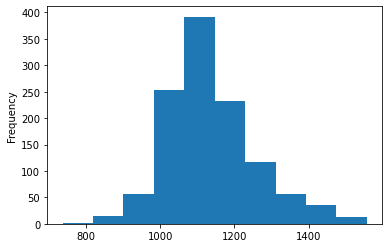

In [18]:
data['sat_avg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

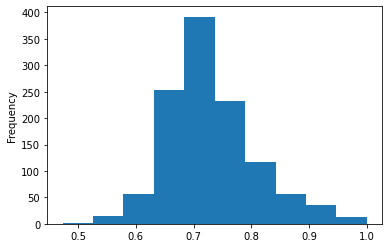

In [19]:
data['n_sat_avg'] = data['sat_avg'] / data['sat_avg'].max()
data['n_sat_avg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

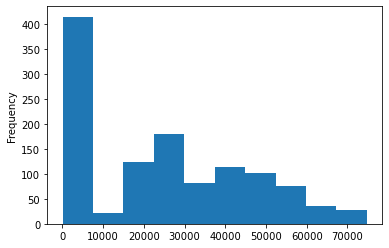

In [20]:
data['average_tuition_1yr'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

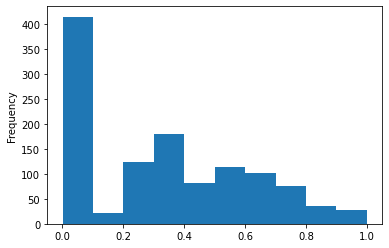

In [21]:
data['n_average_tuition_1yr'] = data['average_tuition_1yr'] / data['average_tuition_1yr'].max()
data['n_average_tuition_1yr'].plot(kind='hist')

### Z-scores

There is a better way of normalizing with Z-scores, where the average is converted to 0.0, then most scores are between -1.0 and +1.0, but extreme outliers are higher. You don't need to know much more than that for now. Thankfully, scipy has a function in stats that calculates it for you:

In [22]:
data['z_sat_avg'] = stats.zscore(data['sat_avg'])
data['z_average_tuition_1yr'] = stats.zscore(data['average_tuition_1yr'])


<AxesSubplot:ylabel='Frequency'>

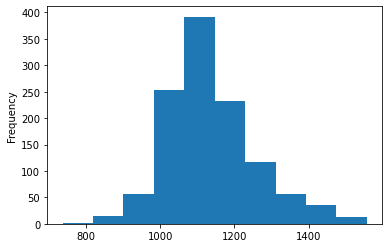

In [23]:
data['sat_avg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

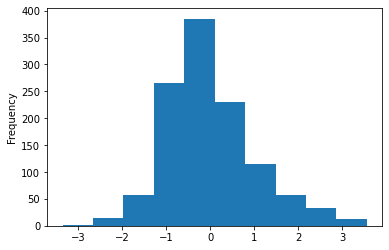

In [24]:
data['z_sat_avg'].plot(kind='hist')

### Weighted rankings

So we need to define our weights for each. The total for absolute value of all the weights (ignore negative sign when adding) should add up to 1.0.

In [25]:
data['z_ranking_sat_tuition'] = data['z_sat_avg'] * .5 + data['z_average_tuition_1yr'] * -.5

In [26]:
sorted_list = data[['name','z_ranking_sat_tuition','sat_avg','average_tuition_1yr']].sort_values('z_ranking_sat_tuition',ascending=False)

## Save and export to Excel

In [27]:
sorted_list.to_excel("z_ranking_sat_tuition.xlsx")